In [12]:
 from src import generator
from importlib import reload
import matplotlib.pyplot as plt
from nptdms import TdmsFile
import pandas as pd
import numpy as np


### Setting hyperparameters
- Number of trajectories: just for visualization below.
- Number of points: The number of points in the trajectories. The lower the number, the more sparse the trajectory.
- Min/Max in each axis: Limits the points to the given range
- Seed: a random seed to ensure reproducibility

In [38]:
# Number of trajectories:
number_of_trajectories = 2

# Number of points per trajectory:
number_of_points = 300

min_torque_x = -3.9
max_torque_x = 3.9
min_torque_y = -3.9
max_torque_y = 3.9
min_torque_z = -3.9
max_torque_z = 3.9

min_force_x = -28
max_force_x = 28
min_force_y = -28
max_force_y = 28
min_force_z = -28
max_force_z = 28

SEED_torque = 429471
SEED_force = 7234

### Dynamic Trajectory
We instantiate the generator with the set parameters. We then call `dynamic.generate_next()` to get the next trajectory.
The remaining code is mainly for visualization.

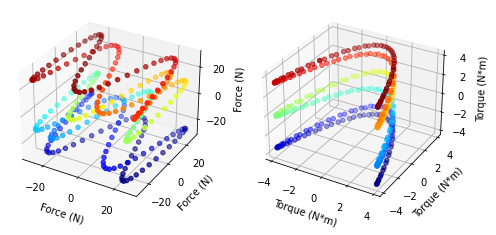

In [39]:
torque = generator.DynamicTrajectory(min_torque_x, max_torque_x, min_torque_y, max_torque_y, min_torque_z, max_torque_z,seed=SEED_torque,sequence_len=number_of_points)
force = generator.DynamicTrajectory(min_force_x, max_force_x, min_force_y, max_force_y, min_force_z, max_force_z,seed=SEED_force,sequence_len=number_of_points)

fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory

    if i % 2 == 0:
        trajectory = force.generate_next()

    else:
        trajectory = torque.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)
    if i % 2 == 0:
        ax.set_xlabel('Force (N)')
        ax.set_ylabel('Force (N)')
        ax.set_zlabel('Force (N)')
    else:
        ax.set_xlabel('Torque (N*m)')
        ax.set_ylabel('Torque (N*m)')
        ax.set_zlabel('Torque (N*m)')
plt.savefig('dynamic_datagen.png')
plt.show()


We have the force trajectories on the left and the torque trajectories on the right with the corresponding min/max values.
### Static Trajectory
Static trajectories can be set up exactly as the dynamic trajectories by calling `generator.StaticTrajectory`.

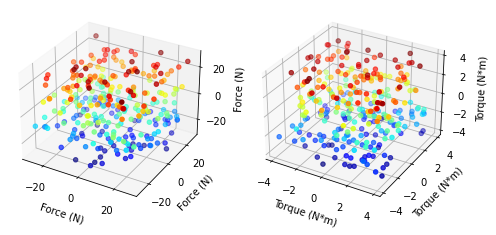

In [44]:
reload(generator)
torque = generator.StaticTrajectory(min_torque_x, max_torque_x, min_torque_y, max_torque_y, min_torque_z, max_torque_z,seed=SEED_torque,sequence_len=number_of_points)
force = generator.StaticTrajectory(min_force_x, max_force_x, min_force_y, max_force_y, min_force_z, max_force_z,seed=SEED_force,sequence_len=number_of_points)

fig = plt.figure(figsize=(8,number_of_trajectories*2))

for i in range(0, number_of_trajectories):
    # generate trajectory

    if i % 2 == 0:
        trajectory = force.generate_next()

    else:
        trajectory = torque.generate_next()

    # set up plot
    ax = plt.subplot(int(number_of_trajectories/2),2,i+1, projection='3d')
    cmjet = plt.get_cmap("jet")
    # plot
    ax.scatter(trajectory[:,0],trajectory[:,1],trajectory[:,2],c=trajectory[:,2],cmap=cmjet)
    if i % 2 == 0:
        ax.set_xlabel('Force (N)')
        ax.set_ylabel('Force (N)')
        ax.set_zlabel('Force (N)')
    else:
        ax.set_xlabel('Torque (N*m)')
        ax.set_ylabel('Torque (N*m)')
        ax.set_zlabel('Torque (N*m)')



plt.savefig('static_datagen.png',transparent=False,dpi=300)
plt.show()


In [16]:
force.generate_next().shape

(300, 3)

### Reading Output
## Dynamic Trajectories

In [46]:
tdms_file = TdmsFile("Fast6Dcalib/20min_dynamic_loading_55top_day2.tdms")
for group in tdms_file.groups():
    df = group.as_dataframe()
    print(group.name)
    print(df.head())
    print(df.keys())
    print(df.shape)



Default
Empty DataFrame
Columns: []
Index: []
Index([], dtype='object')
(0, 0)
20min_dynamic_loading_55top_day2
      56-G1     56-G2     56-G3     56-G4     56-G5     56-G6     55-G1  \
0  2.685718  2.551627  2.673925  2.486339  2.524370  2.200029  2.323542   
1  2.685739  2.551639  2.673931  2.486341  2.524374  2.200023  2.323542   
2  2.685765  2.551680  2.673952  2.486343  2.524368  2.200027  2.323532   
3  2.685777  2.551714  2.673978  2.486319  2.524352  2.199992  2.323511   
4  2.685773  2.551732  2.673972  2.486293  2.524356  2.199980  2.323491   

      55-G2     55-G3     55-G4  ...    Temp-12   Temp-13   Temp-14    Heat-1  \
0  2.615678  2.504003  2.556924  ...  10.580077 -0.000048 -0.000042 -0.000071   
1  2.615670  2.504007  2.556922  ...  10.580077 -0.000050 -0.000044 -0.000073   
2  2.615684  2.504017  2.556936  ...  10.580077 -0.000052 -0.000044 -0.000075   
3  2.615698  2.504015  2.556942  ...  10.580077 -0.000054 -0.000042 -0.000079   
4  2.615684  2.504023  2.556936 

In [47]:
G_idx_56 = ['56-G1', '56-G2', '56-G3', '56-G4','56-G5', '56-G6']
G_idx_55 = ['55-G1', '55-G2', '55-G3', '55-G4','55-G5', '55-G6']
df = tdms_file.groups()[1].as_dataframe()
df[G_idx_55].describe()

,55-G1,55-G2,55-G3,55-G4,55-G5,55-G6
count,6.050000e+06,6.050000e+06,6.050000e+06,6.050000e+06,6.050000e+06,6.050000e+06
mean,2.477791e+00,2.491588e+00,2.497492e+00,2.500161e+00,2.476878e+00,2.422701e+00
std,1.883045e-01,1.802869e-01,1.923309e-01,3.632599e-01,3.977757e-01,3.629257e-01
min,1.983587e+00,2.125095e+00,1.961173e+00,1.579362e+00,1.608142e+00,1.496115e+00
25%,2.337206e+00,2.346741e+00,2.359597e+00,2.221841e+00,2.184989e+00,2.157142e+00
50%,2.477377e+00,2.489009e+00,2.498485e+00,2.500679e+00,2.480622e+00,2.433441e+00
75%,2.620695e+00,2.635099e+00,2.633818e+00,2.779402e+00,2.769429e+00,2.691857e+00
max,2.970465e+00,2.873281e+00,2.999068e+00,3.391964e+00,3.346945e+00,3.323155e+00


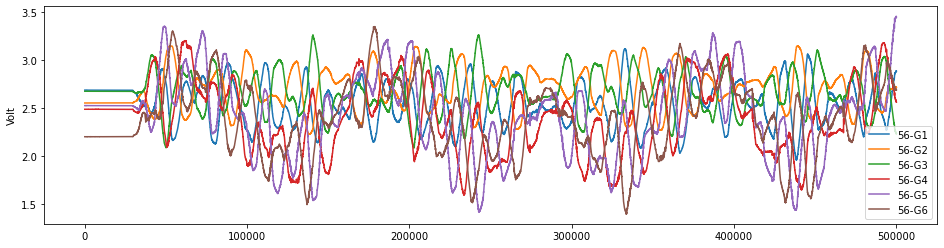

In [48]:
df[G_idx_56].describe()

df[G_idx_56][0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('dynamic_raw_56.png',dpi=300)


In [49]:
df.columns


Index(['56-G1', '56-G2', '56-G3', '56-G4', '56-G5', '56-G6', '55-G1', '55-G2',
       '55-G3', '55-G4', '55-G5', '55-G6', 'Pressure-1', 'Pressure-2',
       'Pressure-3', 'Pressure-4', 'Mic-1', 'Mic-2', 'Mic-3', 'Temp-1',
       'Temp-2', 'Temp-3', 'Temp-4', 'Temp-5', 'Temp-6', 'Temp-7', 'Temp-8',
       'Temp-9', 'Temp-10', 'Temp-11', 'Temp-12', 'Temp-13', 'Temp-14',
       'Heat-1', 'Heat-2', 'Heat-3', 'Heat-4', 'Heat-5', 'Heat-6', 'Heat-7'],
      dtype='object')

Mean-center data:

In [50]:
df_mean = np.subtract(df[G_idx_55+G_idx_56],df[G_idx_55+G_idx_56][:100].mean())

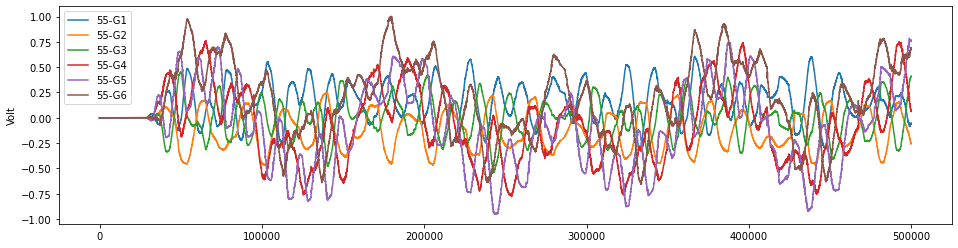

In [51]:
df_mean[G_idx_55][0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('dynamic_mean_center_56.png',dpi=300)

Absolute error

/tmp/ipykernel_10748/2713895212.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  ff_top_abs_err = np.subtract(np.abs(df_mean[G_idx_55]),np.abs(df_mean[G_idx_56]))


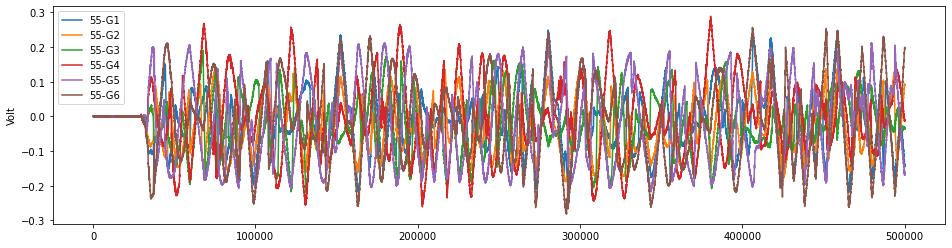

/tmp/ipykernel_10748/3288440953.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  ff_top_abs_err = np.subtract(np.abs(df_mean[G_idx_55]),np.abs(df_mean[G_idx_56]))


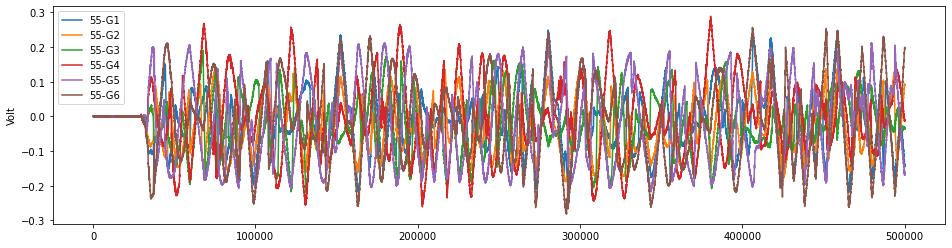

In [53]:
ff_top_abs_err = np.subtract(np.abs(df_mean[G_idx_55]),np.abs(df_mean[G_idx_56]))
ff_top_abs_err[0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('dynamic_abs_error.png',dpi=300);

In [54]:
df_static = TdmsFile("Fast6Dcalib/10min_static_loading56_day2.tdms").groups()[1].as_dataframe()

In [55]:
df = df_static
df[G_idx_55+G_idx_56].describe()

,55-G1,55-G2,55-G3,55-G4,55-G5,55-G6,56-G1,56-G2,56-G3,56-G4,56-G5,56-G6
count,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06,3.050000e+06
mean,2.505232e+00,2.484687e+00,2.506206e+00,2.493656e+00,2.466974e+00,2.446049e+00,2.523747e+00,2.712042e+00,2.679018e+00,2.412913e+00,2.429766e+00,2.438413e+00
std,3.230326e-01,2.568996e-01,2.950831e-01,3.922582e-01,4.147525e-01,4.218474e-01,2.271408e-01,2.128119e-01,2.264072e-01,3.520832e-01,3.752374e-01,3.625809e-01
min,1.273281e+00,1.550704e+00,1.625717e+00,1.171346e+00,1.100059e+00,1.090158e+00,1.884512e+00,1.999049e+00,1.995201e+00,1.306917e+00,1.121649e+00,1.065567e+00
25%,2.274365e+00,2.318258e+00,2.287978e+00,2.219676e+00,2.202922e+00,2.136688e+00,2.358780e+00,2.573952e+00,2.506579e+00,2.132018e+00,2.178610e+00,2.195022e+00
50%,2.521442e+00,2.478221e+00,2.559031e+00,2.467281e+00,2.485974e+00,2.429039e+00,2.509102e+00,2.722498e+00,2.637212e+00,2.423255e+00,2.411805e+00,2.422900e+00
75%,2.734528e+00,2.654991e+00,2.720630e+00,2.779706e+00,2.754948e+00,2.744930e+00,2.711103e+00,2.872231e+00,2.850514e+00,2.661556e+00,2.688729e+00,2.688178e+00
max,3.492688e+00,3.375419e+00,3.509621e+00,3.832005e+00,3.753300e+00,3.838291e+00,3.356831e+00,3.406496e+00,3.257223e+00,3.682178e+00,3.687083e+00,3.519380e+00


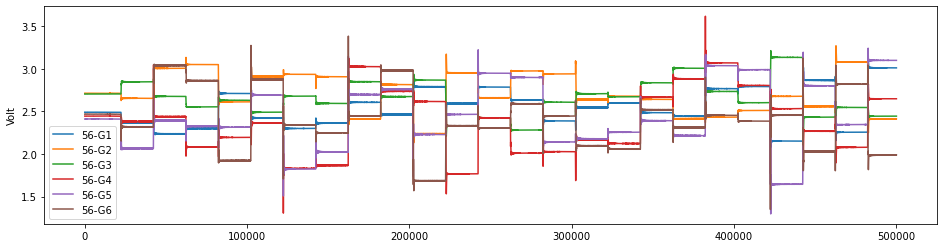

In [56]:
df[G_idx_56].describe()

df[G_idx_56][0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('static_raw_56.png',dpi=300);


In [57]:
df.columns


Index(['56-G1', '56-G2', '56-G3', '56-G4', '56-G5', '56-G6', '55-G1', '55-G2',
       '55-G3', '55-G4', '55-G5', '55-G6', 'Pressure-1', 'Pressure-2',
       'Pressure-3', 'Pressure-4', 'Mic-1', 'Mic-2', 'Mic-3', 'Temp-1',
       'Temp-2', 'Temp-3', 'Temp-4', 'Temp-5', 'Temp-6', 'Temp-7', 'Temp-8',
       'Temp-9', 'Temp-10', 'Temp-11', 'Temp-12', 'Temp-13', 'Temp-14',
       'Heat-1', 'Heat-2', 'Heat-3', 'Heat-4', 'Heat-5', 'Heat-6', 'Heat-7'],
      dtype='object')

Mean-center data:

In [58]:
df_mean = np.subtract(df[G_idx_55+G_idx_56],df[G_idx_55+G_idx_56][:100].mean())

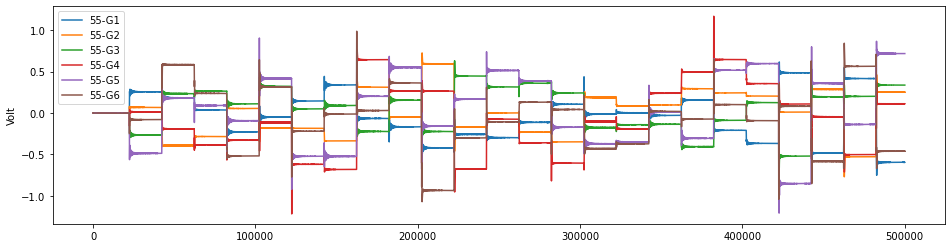

In [59]:
df_mean[G_idx_55][0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('static_mean_center_56.png',dpi=300)

Absolute error

/tmp/ipykernel_10748/2713895212.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  ff_top_abs_err = np.subtract(np.abs(df_mean[G_idx_55]),np.abs(df_mean[G_idx_56]))


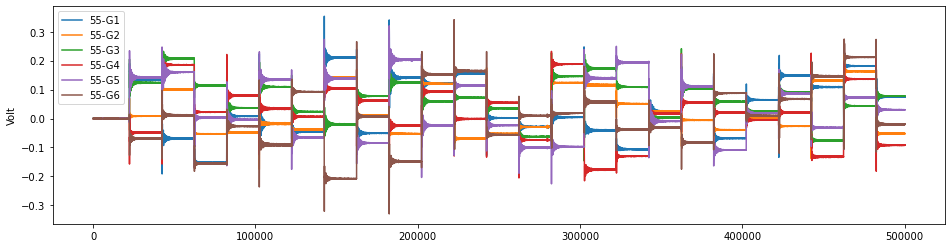

In [60]:
ff_top_abs_err = np.subtract(np.abs(df_mean[G_idx_55]),np.abs(df_mean[G_idx_56]))
ff_top_abs_err[0:500000].plot(figsize=(16,4))
plt.ylabel('Volt');
plt.savefig('static_abs_error.png',dpi=300)

Comparisons (requires synched data)

In [31]:
df_2 = tdms_file_2.groups()[1].as_dataframe()
df_mean_2 = np.subtract(df_2[G_idx_55+G_idx_56],df_2[G_idx_55+G_idx_56][:100].mean())
fs_top_abs_err = np.subtract(np.abs(df_mean_2[G_idx_55]),np.abs(df_mean_2[G_idx_56]))

NameError: name 'tdms_file_2' is not defined

In [ ]:


np.subtract(ff_top_abs_err,fs_top_abs_err).plot(figsize=(16,4))

In [ ]:
fs_top_abs_err[['55-G1']].plot(figsize=(16,4))

In [ ]:
ff_top_abs_err[['55-G1']].plot(figsize=(16,4))